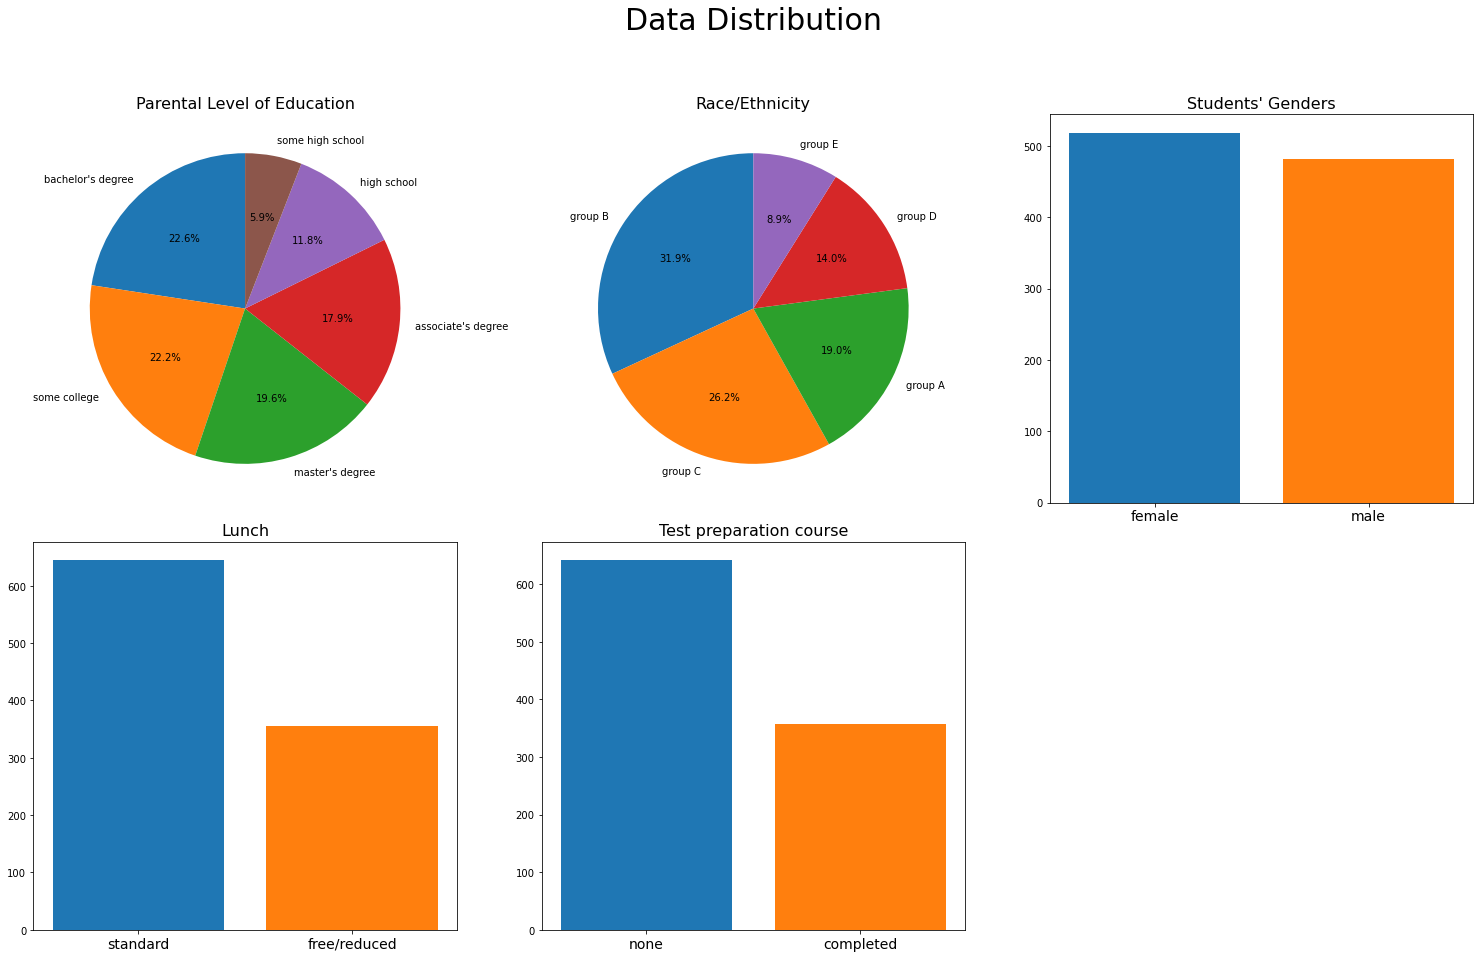

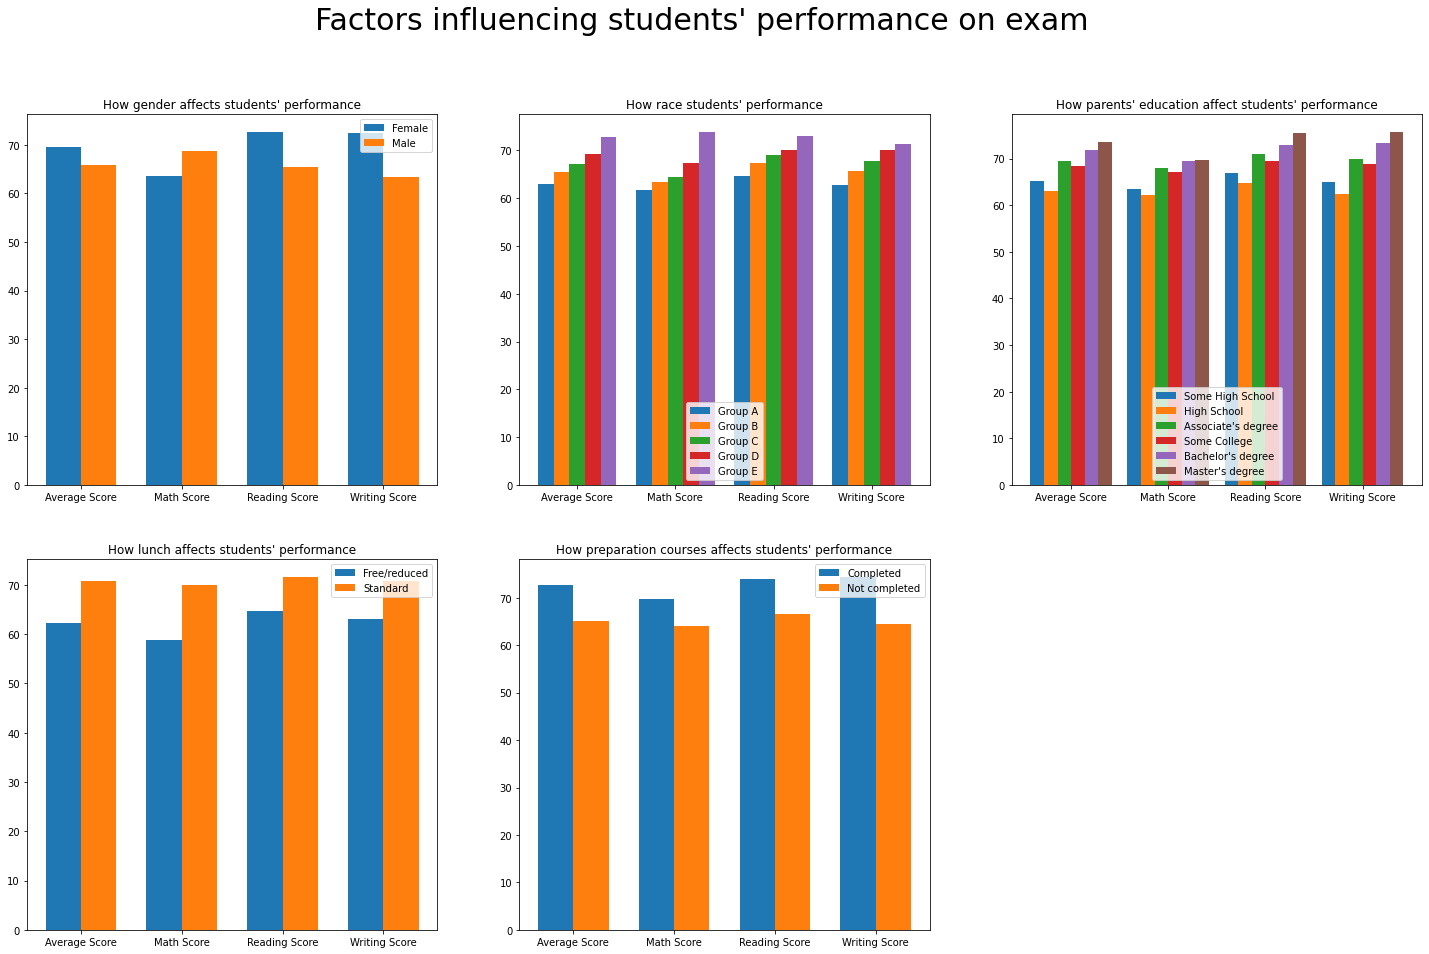

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

bs = pd.read_csv('/Users/louietran/Downloads/bestsellers with categories.csv')

women = pd.read_csv('/Users/louietran/Downloads/Dataset3.csv',sep=';')

stu = pd.read_csv('/Users/louietran/Downloads/StudentsPerformance.csv')
cols = ['sex','race','par_edu','lunch','prep_course','math_score','read_score','write_score']

stu.columns = cols



order = ['some high school', 'high school', "associate's degree",'some college',"bachelor's degree","master's degree"]
order_type = pd.CategoricalDtype(categories=order, ordered=True)
stu['par_edu'] = stu.par_edu.astype(order_type) 

#mapping = {'none': False, 'completed':True}
#stu.prep_course = stu.prep_course.map(mapping)
stu['avg_score']=stu[['math_score','read_score','write_score']].mean(axis=1)

def letter_grade(df,str_col):
    
    col = str_col.replace('_score','_let')
    df[col] = df[str_col]
    bins = [-1,60,70,80,90,100]
    group_names = ['F','D','C','B','A']
    stu[col] = pd.cut(stu[col], bins, labels=group_names)
    stu[col] = st[col]
    return(df.info())


fig, ax = plt.subplots(2,3,figsize=(25,15))
plt.subplots_adjust(left = 0.1, wspace=0.2, hspace=0.1)
fig.suptitle("Data Distribution",fontsize=30)

ax[0,0].pie(stu['par_edu'].value_counts(),labels=stu['par_edu'].unique(), 
        autopct='%1.1f%%',startangle=90,textprops={'fontsize':10})
#ax[0,0].legend(ncol=2,loc='lower center',bbox_to_anchor =(0.5,-0.1),fontsize='small')
ax[0,0].set_title('Parental Level of Education',fontsize=16)


ax[0,1].pie(stu['race'].value_counts(),labels=stu['race'].unique(), 
        autopct='%1.1f%%',startangle=90,textprops={'fontsize':10})
#ax[0,1].legend(ncol=2,loc='lower center',bbox_to_anchor =(0.5,-0.1),fontsize='small')
ax[0,1].set_title('Race/Ethnicity', fontsize = 16)

ax[0,2].bar(stu['sex'].unique(),stu['sex'].value_counts(), color ={'tab:blue','tab:orange'})
ax[0,2].set_title("Students' Genders", fontsize=16)
ax[0,2].set_xticks(np.arange(len(stu['sex'].unique())))
ax[0,2].set_xticklabels(labels=stu['sex'].unique(),fontdict={'fontsize':14})

ax[1,0].bar(stu['lunch'].unique(),stu['lunch'].value_counts(), color ={'tab:blue','tab:orange'})
ax[1,0].set_title("Lunch",fontsize=16)
ax[1,0].set_xticks(np.arange(len(stu['lunch'].unique())))
ax[1,0].set_xticklabels(labels=stu['lunch'].unique(),fontdict={'fontsize':14})


ax[1,1].bar(stu['prep_course'].unique(),stu['prep_course'].value_counts(), color ={'tab:blue','tab:orange'})
ax[1,1].set_title("Test preparation course",fontsize=16)
ax[1,1].set_xticks(np.arange(len(stu['prep_course'].unique())))
ax[1,1].set_xticklabels(labels=stu['prep_course'].unique(),fontdict={'fontsize':14})

ax[1,2].set_visible(False)
plt.show()

fig2, ax2 = plt.subplots(2,3,figsize=(25,15))
fig2.suptitle("Factors influencing students' performance on exam",fontsize=30)
ax2[1,2].set_visible(False)
#How gender affects students' performance on exam
stu1 = stu.melt(id_vars='sex',value_vars=['math_score','read_score','write_score','avg_score'],var_name='subject',value_name='score')
stu1 = stu1.groupby(['subject','sex'])['score'].mean().unstack()
labels =['Average Score', 'Math Score', 'Reading Score','Writing Score']
x = np.arange(len(labels))
width = 0.35
ax2[0,0].bar(x-width/2,stu1['female'],width,label='Female')
ax2[0,0].bar(x+width/2,stu1['male'],width,label='Male')
ax2[0,0].legend()
ax2[0,0].set_xticks(x)
ax2[0,0].set_xticklabels(labels)
ax2[0,0].set_title("How gender affects students' performance",fontsize=12)


#How race affects students' performance on exam
stu2 = stu.melt(id_vars='race',value_vars=['math_score','read_score','write_score','avg_score'],var_name='subject',value_name='score')
stu2 = stu2.groupby(['subject','race'])['score'].mean().unstack()
width2 = 0.16
ax2[0,1].bar(x-width2*2,stu2['group A'],width2,label='Group A')
ax2[0,1].bar(x-width2,stu2['group B'],width2,label='Group B')
ax2[0,1].bar(x,stu2['group C'],width2,label='Group C')
ax2[0,1].bar(x+width2,stu2['group D'],width2,label='Group D')
ax2[0,1].bar(x+width2*2,stu2['group E'],width2,label='Group E')
ax2[0,1].set_xticks(x)
ax2[0,1].set_xticklabels(labels)
ax2[0,1].set_title("How race students' performance")
ax2[0,1].legend()


#How parents education affects students' performance on exam
stu3 = stu.melt(id_vars='par_edu',value_vars=['math_score','read_score','write_score','avg_score'],var_name='subject',value_name='score')
stu3 = stu3.groupby(['subject','par_edu'])['score'].mean().unstack() 
width3 = 0.14
ax2[0,2].bar(x,stu3['some high school'],width3,label='Some High School')
ax2[0,2].bar(x+1*width3,stu3['high school'],width3,label='High School')
ax2[0,2].bar(x+2*width3,stu3["associate's degree"],width3,label="Associate's degree")
ax2[0,2].bar(x+3*width3,stu3['some college'],width3,label='Some College')
ax2[0,2].bar(x+4*width3,stu3["bachelor's degree" ],width3,label="Bachelor's degree")
ax2[0,2].bar(x+5*width3,stu3["master's degree"],width3,label="Master's degree")
ax2[0,2].set_xticks(x+0.35)
ax2[0,2].set_xticklabels(labels)
ax2[0,2].legend(loc='lower center')
ax2[0,2].set_title("How parents' education affect students' performance")


#Lunch
stu4 = stu.melt(id_vars='lunch',value_vars=['math_score','read_score','write_score','avg_score'],var_name='subject',value_name='score')
stu4 = stu4.groupby(['subject','lunch'])['score'].mean().unstack()
x = np.arange(len(labels))
width4 = 0.35
ax2[1,0].bar(x-width4/2,stu4['free/reduced'],width,label='Free/reduced')
ax2[1,0].bar(x+width4/2,stu4['standard'],width,label='Standard')
ax2[1,0].set_title("How lunch affects students' performance")
ax2[1,0].set_xticks(x)
ax2[1,0].legend()
ax2[1,0].set_xticklabels(labels)


#prep_course
stu5 = stu.melt(id_vars='prep_course',value_vars=['math_score','read_score','write_score','avg_score'],var_name='subject',value_name='score')
stu5 = stu5.groupby(['subject','prep_course'])['score'].mean().unstack()
ax2[1,1].set_title("How preparation courses affects students' performance")
width5 = 0.35
ax2[1,1].bar(x-width5/2,stu5['completed'],width,label='Completed')
ax2[1,1].bar(x+width5/2,stu5['none'],width,label='Not completed')
ax2[1,1].legend()
ax2[1,1].set_xticks(x)
ax2[1,1].set_xticklabels(labels)
plt.show()

1. Data Distribution
    In the first figure, I examined the distribution of the given dataset. In terms of parental education, more than 80% students' parents completed high school and more than 22% completed college. The students participated in this survey are from five difference race/ethnicity coded as A, B, C, D, and E, in which group A, B, and C are the dominant group. There are more males than female participants even though the difference is minimal. Finally, most students have standard lunch and do not complete a test preparation course. 
    
2. Factors influencing students' performance on exam
    In the second figure, I want to identify factors that influence students' performance on exam. From the first graph, we can see that on average, female students perform better on an exam than male students. To be more specific, female students receive higher score for reading and writing while male students get higher score in math. Therefore, we can conclude male students are better at science subjects while female students tend to excel in humanity subjects.
    
    In the second graph, we're looking to how students from different races perform on tests. We can see that overall, students from group E score better on an exam than the rest of the students, especially in math while students from group A perform the worst. While students from group E perform bests on math exam, students from other groups tend to do better on reading exam. 
    
    In the third graph, we can see that students whose parents completed a master degree tend to score highest on every exam. However, there is an interesting finding here, which is that students whose parents did not complete high school actually perform better than students whose parents completed high school. In addition to that, students whose parents completed an associated degree also tend to do better than those who parents did not complete college. 
    
    In the fourth graph, it can be noticed that students who eat standard lunch do better on every test than those who  have reduced or free lunch, which proves that the quality of lunch can have great impact on students' performance on exam. 
    Lastly, in the fifth graph, it can be seen that test preparation course plays an important role in students getting high score for any exam. Students who completed test preparation course tend to do best in humanity subjects than science subjects. 